## Praproses Data Curah Hujan. Sumber CRU Climate TS 4.05

- https://data.ceda.ac.uk/badc/cru/data/cru_ts/cru_ts_4.05

In [1]:
# Pustaka untuk manipulasi data tabular
import numpy as np
import pandas as pd

# Pustaka untuk membaca format nc
import xarray as xr
from netCDF4 import Dataset

# Pustaka untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Akusisi Data

In [2]:
# mebaca dataset 2001 - 2010
df1 = xr.open_dataset("D:/Belajar Python/tesis/dataset/cru_ts4.05.2001.2010.pre.dat.nc")

In [3]:
# mebaca dataset 2011 - 2020
df2 = xr.open_dataset("D:/Belajar Python/tesis/dataset/cru_ts4.05.2011.2020.pre.dat.nc")

#### 2. Praproses data tahun 2001 - 2010

In [4]:
# menentukan lokasi sumatera selatan
df1 = df1.sel(lon=103.914399,lat=-3.3194374,method='nearest')

In [5]:
# merubah format spasial temporal menjadi tabular
x = df1.to_dataframe()

In [6]:
# reset index berdasarkan tanggal
x = x.reset_index()

In [7]:
# menampilkan isi data
x.head()

,time,lon,lat,pre,stn
0,2001-01-16,103.75,-3.25,418.600006,3.0
1,2001-02-15,103.75,-3.25,295.399994,3.0
2,2001-03-16,103.75,-3.25,360.600006,3.0
3,2001-04-16,103.75,-3.25,403.700012,3.0
4,2001-05-16,103.75,-3.25,116.900002,3.0


#### 3. Praproses data tahun 2010 - 2020

In [8]:
# menentukan lokasi sumatera selatan
df2 = df2.sel(lon=103.914399,lat=-3.3194374,method='nearest')

In [9]:
# merubah format spasial temporal menjadi tabular
y = df2.to_dataframe()

In [10]:
# reset index berdasarkan tanggal
y = y.reset_index()

In [11]:
# menampilkan isi data
y.head()

,time,lon,lat,pre,stn
0,2011-01-16,103.75,-3.25,389.899994,5.0
1,2011-02-15,103.75,-3.25,308.200012,6.0
2,2011-03-16,103.75,-3.25,360.899994,6.0
3,2011-04-16,103.75,-3.25,422.300018,5.0
4,2011-05-16,103.75,-3.25,147.199997,3.0


#### 4. Penggabungan Data 2001 - 2020

In [12]:
# Proses penggabungan data
result = pd.concat([x, y])

In [25]:
result

,time,lon,lat,pre,stn
0,2001-01-16,103.75,-3.25,418.600006,3.0
1,2001-02-15,103.75,-3.25,295.399994,3.0
2,2001-03-16,103.75,-3.25,360.600006,3.0
3,2001-04-16,103.75,-3.25,403.700012,3.0
4,2001-05-16,103.75,-3.25,116.900002,3.0
...,...,...,...,...,...
115,2020-08-16,103.75,-3.25,82.700005,6.0
116,2020-09-16,103.75,-3.25,211.800003,6.0
117,2020-10-16,103.75,-3.25,437.300018,4.0
118,2020-11-16,103.75,-3.25,237.400009,5.0


#### 5. Export pandas to excel

In [26]:
# result.to_excel("output.xlsx",index = False)

#### Visualisasi Data Timne Series

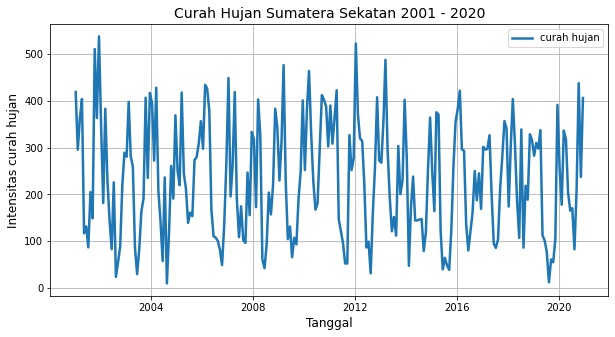

In [19]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(result["time"], result["pre"], color="tab:blue", label="curah hujan", linewidth=2.5)

# membuat label-label
ax.set_title("Curah Hujan Sumatera Sekatan 2001 - 2020", fontsize=14)
ax.set_xlabel("Tanggal", fontsize=12)
ax.set_ylabel("Intensitas curah hujan", fontsize=12)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()